In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Eg_cov as eg
import utils as u

In [2]:
# Load the joint covariance matrix:#
joint_cov = np.loadtxt('../txtfiles/joint_covariance_rp0=1.5_Jul2025.dat')
#joint_cov = np.loadtxt('../txtfiles/joint_covariance_rp0=1.5_Jul2025_LSSTY10.dat')

In [3]:
# Parameters
lens = 'DESI'
src = 'LSST'
Pimax=900.
rp0 = 1.5

# Number of E_G samples to draw:
Nsamp = 10000

endfilename = 'EG_cov'

# Use the same cosmological parameters as Shadab's simulations:
h=0.69
OmB = 0.022/h**2

OmM = 0.292

# Using now nonliner bias parameters as fit in Kitanis & White 2022. 
# They fit LTP parameters so we convert these to their Eulerian equivalents.
b1_LPT = 1.333
b2_LPT = 0.514
bs_LPT = 0 # They fix this to 0.

# Convert to Eulerian using the conversions in Chen, Vlah & White 2020 (these use the same convention as Kitanis & White 2022)
b1 = 1.0 + b1_LPT
b2 = b2_LPT + 8./21.*(b1_LPT)
bs = bs_LPT - 2./7*(b1_LPT)

#b1 = 2.03
#b2 = 0.9*(b1-1.0)**2-0.5 # From Fast-PT example notebook which says 
#'(this is a numerical fit to simulation k2Pnl1_regdata, but a relationship of this form is motivated in the spherical collapse picture'
#bs = -4.0/7.0*(b1-1.0) # The 'coevolution value' see Pandey et al. DES Y3 papers

params = {'mu_0': 0., 'sigma_0':0., 'OmB':OmB, 'h':h, 'n_s':0.965, 'A_s':2.115 * 10**(-9),'b':b1, 'OmM': 0.292, 'b_2':b2, 'b_s': bs} 

#Nsamps=100000

print('b1=', b1)
print('b2=', b2)
print('bs=', bs)

b1= 2.333
b2= 1.021809523809524
bs= -0.38085714285714284


In [4]:
# Scale cuts. 0 means cut the bin, 1 means keep it.
#rp_c_scalecuts, scalecuts = np.loadtxt('../txtfiles/scalecuts_nLbias_KitanidisWhite2022.dat', unpack=True)

rp_bin_c_raw = np.loadtxt('../data_for_Danielle/test-HOD-PB00-z0.75-w1pz_cat-zRSD-model-5-gxm-sel-crossparticles-wtag-w1-rfact10-bin1-wp-logrp-pi-NJN-100.txt.upsilon')[:,0]
rp_bin_edges_raw = u.rp_bin_edges_log(rp_bin_c_raw)

#Cut the bin containing rp0 and lower.
ind = next(j[0] for j in enumerate(rp_bin_edges_raw) if j[1]>rp0)
rp_bin_c = rp_bin_c_raw[ind:]
rp_bin_edges = rp_bin_edges_raw[ind:]

print('rp bin c=', rp_bin_c)
print('rp bin edges=', rp_bin_edges)

rp bin c= [ 1.83709466  2.42176242  3.19250463  4.20854074  5.54793718  7.31360558  9.64120984 12.70958983 16.75450244 22.08673575 29.11598823 38.38234769 50.59778848 66.70087562 87.92887875]
rp bin edges= [  1.60004256   2.10926689   2.78055529   3.66548575   4.83205129   6.36988417   8.39714273  11.06958999  14.5925616   19.23674266  25.35896564  33.42962733  44.0688315   58.09403408  76.5828519  100.95586057]


In [5]:
# Use this to get the EG covariances:

Nsamps = 10000

EG_cov = eg.get_egcov(joint_cov, params, rp_bin_edges, rp_bin_c, rp0, lens, src, Pimax, Nsamps, endfilename)

# Save this:
#np.savetxt('../txtfiles/eg_cov_Y10.dat', EG_cov)


maxchi= 6669.353003473356
end of upsgm binned


In [6]:
# Get the correlation:

eg_corr = np.zeros_like(EG_cov)
for i in range(0,15):
    for j in range(0,15):
        eg_corr[i,j] = EG_cov[i,j]/np.sqrt(EG_cov[i,i]*EG_cov[j,j])

In [7]:
cmap=plt.get_cmap('PuOr')
plt.figure(figsize=[6,6])
plt.imshow(np.log10(EG_cov_Y1), cmap=cmap)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
cbar2 = plt.colorbar()
cbar2.ax.tick_params(labelsize=15)
#plt.savefig('../plots/sims_corr_myunits_wSN_rp0=1.5_Y10.pdf')
plt.show()

cmap=plt.get_cmap('PuOr')
plt.figure(figsize=[6,6])
plt.imshow(eg_corr_Y1, cmap=cmap, vmin=-1, vmax=1)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
cbar2 = plt.colorbar()
cbar2.ax.tick_params(labelsize=15)
#plt.savefig('../plots/sims_corr_myunits_wSN_rp0=1.5_Y10.pdf')
plt.show()

NameError: name 'EG_cov_Y1' is not defined

<Figure size 600x600 with 0 Axes>

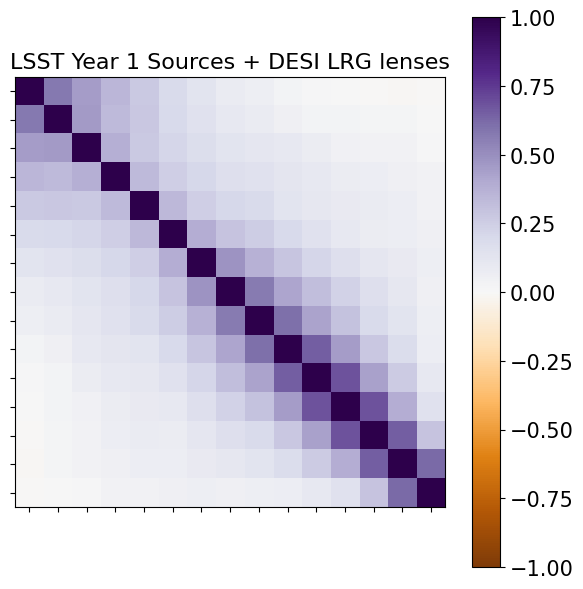

In [7]:
cmap = plt.get_cmap('PuOr')
plt.figure(figsize=[6, 6])
plt.imshow(eg_corr, cmap=cmap, vmin=-1, vmax=1)

# Keep tick positions but remove labels
num_bins = len(rp_bin_c)
tick_positions = np.arange(num_bins)

plt.xticks(tick_positions, [''] * num_bins, fontsize=15)
plt.yticks(tick_positions, [''] * num_bins, fontsize=15)

# Axis labels with units
#plt.xlabel(r"$r_p$ [$\mathrm{Mpc}/h$]", fontsize=16)
#plt.ylabel(r"$r_p$ [$\mathrm{Mpc}/h$]", fontsize=16)

# Colorbar
cbar2 = plt.colorbar()
cbar2.ax.tick_params(labelsize=15)
plt.title('LSST Year 1 Sources + DESI LRG lenses', fontsize=16)
plt.tight_layout()
#plt.savefig('../plots/EG_corr_LSSTY10.pdf')
plt.show()

In [6]:
# This is from the hybrid (sims + analytic for different elements) covariance matrix
eg_matrix = np.loadtxt('../txtfiles/egcov_sims_wSN_Mar2025.txt')

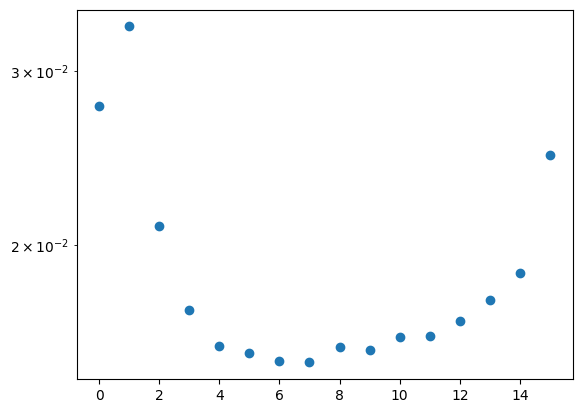

In [3]:
# Look at diagonal elements (errors)

plt.figure()
plt.semilogy(np.sqrt(np.diag(eg_matrix)), 'o', label='error on $E_G$')
plt.show()

In [4]:
# Get the correlation matrix

corr_eg = np.zeros_like(eg_matrix)
for i in range(0,len(eg_matrix[0,:])):
    for j in range(0,len(eg_matrix[:,0])):
        corr_eg[i,j] = eg_matrix[i,j] / np.sqrt(eg_matrix[i,i] * eg_matrix[j,j])  

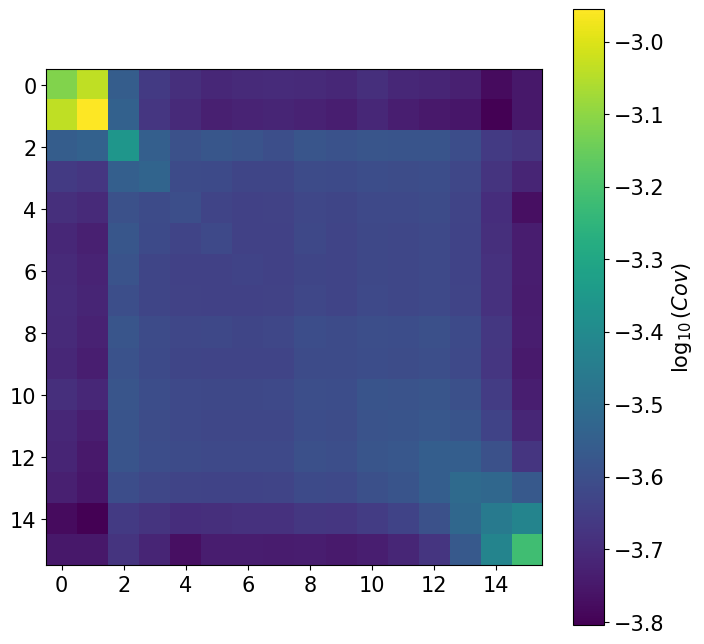

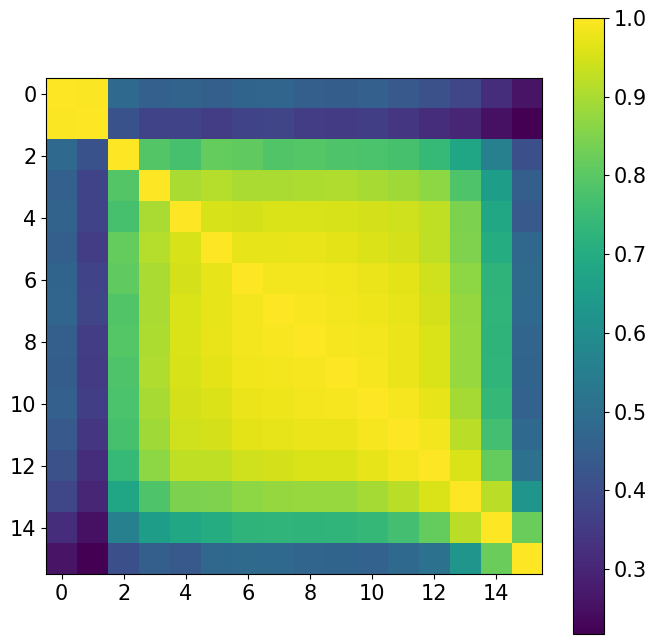

In [5]:
plt.figure(figsize=[8,8])
plt.imshow(np.log10(eg_matrix))
cbar1=plt.colorbar()
#plt.imshow(np.log10(-eg_matrix), cmap=plt.cm.magma)
#cbar2=plt.colorbar()
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
cbar1.ax.tick_params(labelsize=15)
#cbar2.ax.tick_params(labelsize=15)
cbar1.set_label('$\log_{10}(Cov)$', fontsize=15)
#cbar2.set_label('$\log_{10}(-Cov)$', fontsize=15)
plt.savefig('../plots/sims_Egcov_log10_Mar25.pdf')
plt.show()

plt.figure(figsize=[8,8])
plt.imshow(corr_eg)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
cbar1 = plt.colorbar()
cbar1.ax.tick_params(labelsize=15)
plt.savefig('../plots/sims_Egcorr_Mar25.pdf')
plt.show()

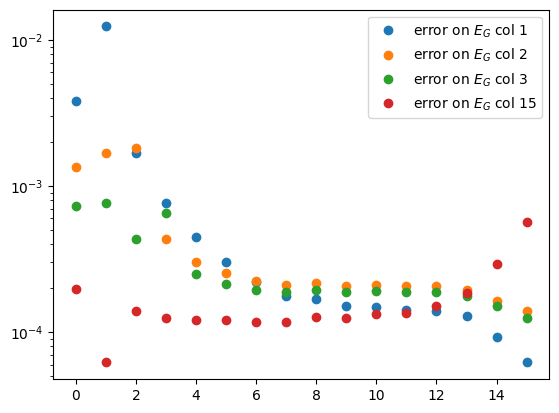

In [9]:
# Correlation between first and largest rp bin is weird, what's going on?
plt.figure()
plt.semilogy(eg_matrix[:,1], 'o', label='error on $E_G$ col 1')
plt.semilogy(eg_matrix[:,2], 'o', label='error on $E_G$ col 2')
plt.semilogy(eg_matrix[:,3], 'o', label='error on $E_G$ col 3')
plt.semilogy(eg_matrix[:,15], 'o', label='error on $E_G$ col 15')
plt.legend()
#plt.semilogy(-eg_matrix[:,1], 'o', label='error on $E_G$')
plt.show()